[[-0.6487467 ]
 [ 0.10894739]]
[[-0.59455395]
 [ 0.10079896]]
[[-0.6487467 ]
 [ 0.10894739]]
训练误差:
最小二乘法: 0.613402
梯度下降法: 0.614148
牛顿法: 0.613402

测试误差:
最小二乘法: 0.595043
梯度下降法: 0.593412
牛顿法: 0.595043


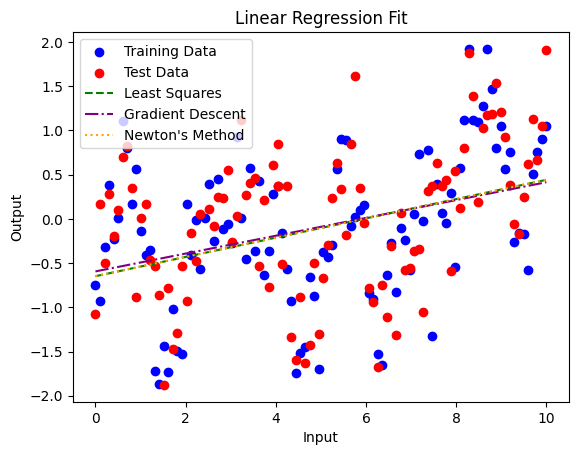

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, 0].reshape(-1, 1)  # 输入数据
    y = data[:, 1].reshape(-1, 1)  # 期望输出
    return X, y

#加偏置
def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(epochs):
        gradient = (1 / m) * X.T @ (X @ theta - y)
        theta -= lr * gradient
    return theta

def newton_method(X, y, epochs=10):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(epochs):
        gradient = (1 / m) * X.T @ (X @ theta - y)
        hessian = (1 / m) * X.T @ X
        theta -= np.linalg.inv(hessian) @ gradient
    return theta

def compute_mse(X, y, theta):
    predictions = X @ theta
    mse = np.mean((predictions - y) ** 2)
    return mse

def calculate(train_data, test_data):
    # 加载数据
    train_X, train_y = load_data(train_data)
    test_X, test_y = load_data(test_data)

    # 添加偏置项
    train_X_b = add_bias(train_X)
    test_X_b = add_bias(test_X)

    # 最小二乘法
    theta_ls = least_squares(train_X_b, train_y)
    print(theta_ls)
    train_mse_ls = compute_mse(train_X_b, train_y, theta_ls)
    test_mse_ls = compute_mse(test_X_b, test_y, theta_ls)

    # 梯度下降法
    theta_gd = gradient_descent(train_X_b, train_y, lr=0.01, epochs=1000)
    print(theta_gd)
    train_mse_gd = compute_mse(train_X_b, train_y, theta_gd)
    test_mse_gd = compute_mse(test_X_b, test_y, theta_gd)

    # 牛顿法
    theta_newton = newton_method(train_X_b, train_y, epochs=10)
    print(theta_newton)
    train_mse_newton = compute_mse(train_X_b, train_y, theta_newton)
    test_mse_newton = compute_mse(test_X_b, test_y, theta_newton)

    # 打印误差
    print("训练误差:")
    print(f"最小二乘法: {train_mse_ls:.6f}")
    print(f"梯度下降法: {train_mse_gd:.6f}")
    print(f"牛顿法: {train_mse_newton:.6f}")

    print("\n测试误差:")
    print(f"最小二乘法: {test_mse_ls:.6f}")
    print(f"梯度下降法: {test_mse_gd:.6f}")
    print(f"牛顿法: {test_mse_newton:.6f}")

    # 可视化拟合结果
    plt.scatter(train_X, train_y, color='blue', label='Training Data')
    plt.scatter(test_X, test_y, color='red', label='Test Data')
    X_line = np.linspace(min(train_X), max(train_X), 100)
    X_line_b = add_bias(X_line.reshape(-1, 1))
    plt.plot(X_line, X_line_b @ theta_ls, label='Least Squares', linestyle='--', color='green')
    plt.plot(X_line, X_line_b @ theta_gd, label='Gradient Descent', linestyle='-.', color='purple')
    plt.plot(X_line, X_line_b @ theta_newton, label='Newton\'s Method', linestyle=':', color='orange')
    plt.legend()
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Linear Regression Fit')
    plt.show()

if __name__=='__main__':
    # 加载数据
    train_data = r"F:\python练习\ML_homework1\data\train_data.txt"
    test_data = r"F:\python练习\ML_homework1\data\test_data.txt"
    calculate(train_data, test_data)


Epoch 1/5000, Train Loss: 0.8867, Test Loss: 0.6453
Epoch 2/5000, Train Loss: 0.8769, Test Loss: 0.6979
Epoch 3/5000, Train Loss: 0.8088, Test Loss: 0.6942
Epoch 4/5000, Train Loss: 0.8598, Test Loss: 0.6593
Epoch 5/5000, Train Loss: 0.8015, Test Loss: 0.7125
Epoch 6/5000, Train Loss: 0.8202, Test Loss: 0.6385
Epoch 7/5000, Train Loss: 0.7820, Test Loss: 0.6812
Epoch 8/5000, Train Loss: 0.9178, Test Loss: 0.6635
Epoch 9/5000, Train Loss: 0.7996, Test Loss: 0.7059
Epoch 10/5000, Train Loss: 0.8481, Test Loss: 0.6538
Epoch 11/5000, Train Loss: 0.7750, Test Loss: 0.7157
Epoch 12/5000, Train Loss: 0.9063, Test Loss: 0.6953
Epoch 13/5000, Train Loss: 0.7416, Test Loss: 0.6918
Epoch 14/5000, Train Loss: 0.8072, Test Loss: 0.6553
Epoch 15/5000, Train Loss: 0.7505, Test Loss: 0.6471
Epoch 16/5000, Train Loss: 0.7579, Test Loss: 0.6722
Epoch 17/5000, Train Loss: 0.6926, Test Loss: 0.6656
Epoch 18/5000, Train Loss: 0.7402, Test Loss: 0.6684
Epoch 19/5000, Train Loss: 0.7473, Test Loss: 0.6934
Ep

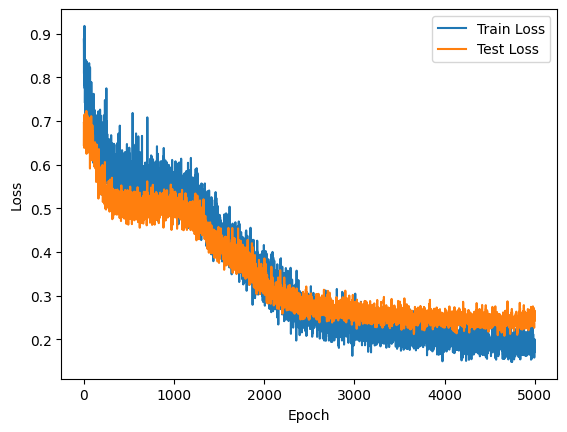

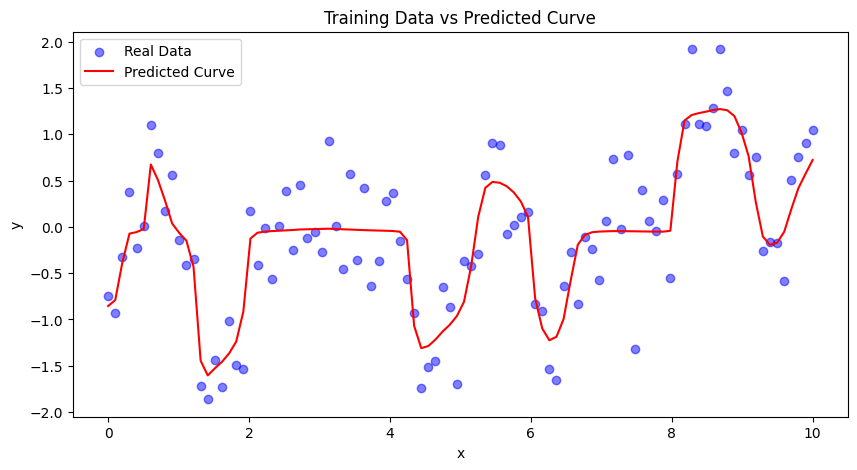

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# 定义BP神经网络模型
class BPNet(nn.Module):
    def __init__(self):
        super(BPNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(1, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
        )
        self.layer2 = nn.Sequential(
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4)
        )
        self.layer5 = nn.Sequential(
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer6 = nn.Sequential(
            nn.Linear(256, 128),
            #nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.6)
        )
        self.layer7 = nn.Sequential(
            nn.Linear(128, 32),
            #nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.layer8 = nn.Sequential(
            nn.Linear(32, 1)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                #if m.bias is not None:
                 #   nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        return x


# 训练模型
def train(train_path, test_path):
    # 读取数据
    train_data = np.loadtxt(train_path, delimiter=None)
    test_data = np.loadtxt(test_path, delimiter=None)

    x_train, y_train = train_data[:, 0:1], train_data[:, 1:2]
    x_test, y_test = test_data[:, 0:1], test_data[:, 1:2]

    # 转换为张量
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    x_test = torch.tensor(x_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # 数据加载器
    train_dataset = TensorDataset(x_train, y_train)
    test_dataset = TensorDataset(x_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

    # 模型、损失函数、优化器
    model = BPNet()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # 训练过程
    num_epochs = 5000
    train_losses, test_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # 测试集评估
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    # 绘制损失曲线
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # 预测训练集数据并可视化
    model.eval()
    with torch.no_grad():
        y_pred = model(x_train).numpy()

    plt.figure(figsize=(10, 5))
    plt.scatter(x_train.numpy(), y_train.numpy(), label="Real Data", color="blue", alpha=0.5)
    plt.plot(x_train.numpy(), y_pred, label="Predicted Curve", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Training Data vs Predicted Curve")
    plt.show()

    # 保存模型
    torch.save(model.state_dict(), "bp_model.pth")

def val_visualization(test_path):
    model = BPNet()
    # 加载保存的模型参数
    model.load_state_dict(torch.load("bp_model.pth"))
    # 设置为评估模式
    model.eval()

    # 读取测试数据
    test_data = np.loadtxt(test_path, delimiter=None)
    x_test, y_test = test_data[:, 0:1], test_data[:, 1:2]

    # 转换为 PyTorch 张量
    x_test = torch.tensor(x_test, dtype=torch.float32)

    # 使用模型进行预测
    with torch.no_grad():
        y_pred = model(x_test).numpy()

    # 绘制测试集真实数据点和预测曲线
    plt.figure(figsize=(10, 5))
    plt.scatter(x_test.numpy(), y_test, label="Real Data", color="green", alpha=0.5)
    plt.plot(x_test.numpy(), y_pred, label="Predicted Curve", color="pink")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Test Data vs Predicted Curve")
    plt.show()


if __name__ == "__main__":
    train_path = r"F:\\python练习\\ML_homework1\\data\\train_data.txt"
    test_path = r"F:\\python练习\\ML_homework1\\data\\test_data.txt"
    train(train_path, test_path)
    #val_visualization(test_path)

